# HW3

<b>Instructions:</b> Write your answers in the empty code cells below.

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code does not work on different data</li>
<li>You use for loops (unless explicitly permitted)</li>
</ul>

## Problem

Start by executing the following code, which creates a Series object <b>stock</b> of share prices of Nvidia. 

In [1]:
autosave 60

Autosaving every 60 seconds


In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('NVDA.csv',index_col=0, parse_dates=True)
#data = pd.read_csv('NVDA.csv',index_col=0)
#data.index=data1.index.astype('datetime64[ns]')
#kept stock as redundant variable
stock = data['Close']

In [3]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#Set to 2 decimal places, and display all columns (and up to 300 rows)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 300)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:xlabel='Date'>

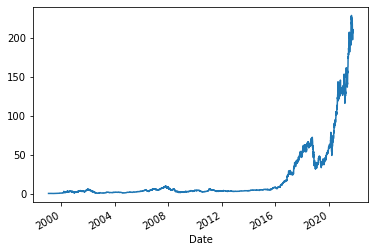

In [5]:
%pylab inline
stock.plot()

In [6]:
stock.head()
stock.tail()

Date
1999-01-22   0.41
1999-01-25   0.45
1999-01-26   0.42
1999-01-27   0.42
1999-01-28   0.42
Name: Close, dtype: float64

Date
2021-10-07   210.75
2021-10-08   208.31
2021-10-11   206.95
2021-10-12   206.71
2021-10-13   209.39
Name: Close, dtype: float64

Use the Series <i>stock</i> to answer the following questions.

## Question 1

### Q1.1, When is the first date this sotck close at more than 130 dollars? (pick the closest date in Camino)

In [7]:
starting_date = stock[stock.values > 130].index.min()

In [8]:
starting_date

Timestamp('2020-08-28 00:00:00')

### Q1.2, After stock price hit 130 dollar, how many trading days it took to reach the historical high? (pick the closest number of days in Camino)

In [9]:
high_date = stock[stock.values == stock.values.max()].index.min()

In [10]:
#based on the "Close" column
len(data[(data.index >= starting_date) & (data.index <= high_date)])

257

In [11]:
print('Number of trading days after reaching 130 to reach historical high (close): '\
      + str(len(data[(data.index >= starting_date) & (data.index <= high_date)])))

Number of trading days after reaching 130 to reach historical high (close): 257


### Question 2

### Find the top 5 largest one-day % gain (in % compared to the closing cost of the previous trading day). Make sure that your output is a Series object that shows both date and the % gain. (pick the date closest to the day with the largest gain ratio in Camino)

In [12]:
percent_change = [(stock - stock.shift(-1))/(stock)] * 100

In [13]:
data['previous_close'] = data['Close'].shift(1)

In [14]:
data['percent_change'] = (data['Close'] - data['previous_close'])/(data['previous_close'])*100

In [15]:
top_gains = data.sort_values('percent_change', ascending = False).head(5)['percent_change']

In [16]:
top_gains

Date
2000-03-07   42.41
2003-05-09   33.06
2001-01-03   30.69
2016-11-11   29.81
2000-03-13   26.48
Name: percent_change, dtype: float64

## Question 3

###  With following investment strategy: buy on day 1, sell on day 3. If based on this strategy, what's the most dollars amount you can lose in one trading?  Also report the buying and selling date for that particular trade. ( pick the closest dollar amount it dropped in Camino)

In [17]:
data['sale_difference'] = data['Close'].diff(periods=2)

In [18]:
#Most one can lose in one trading day
data['sale_difference'].min()

-17.919997999999993

In [19]:
sell_date = data['sale_difference'].idxmin()

In [20]:
#sell date
sell_date

Timestamp('2020-11-10 00:00:00')

In [21]:
#buy date
stock[stock.index<=sell_date].index[-3]

Timestamp('2020-11-06 00:00:00')

## Question 4

### In which days did we observe that the price has increased of more than 60% within the 9 preceding trading sessions? Report your result as a Series (d,gain) where *d* is the trading session date when the increase was observed and *gain* is the maximum percentage gain (%) observed over the 9 days preceding session(today compare with previous 9 trading days).
#### *Hint:* use a **rolling** minimum . Today + 9 more days -> use rolling(10). (pick the closest date that has the highest gain ratio in Camino) 

In [22]:
future_price = stock.rolling(10).min()

In [23]:
data['buying_price'] = data['Close'].rolling(10).min()

In [24]:
#High - 9 day minimum buying price / buying price
data['nine_day_gain'] = (data['Close'] - data['buying_price']) / data['buying_price'] * 100

In [25]:
data[data.nine_day_gain > 60]

,Open,High,Low,Close,Adj Close,Volume,previous_close,percent_change,sale_difference,buying_price,nine_day_gain
Date,,,,,,,,,,,
2000-02-18,1.24,1.42,1.23,1.40,1.29,96086400,1.26,11.59,0.19,0.79,77.01
2000-02-22,1.36,1.38,1.31,1.36,1.25,54249600,1.40,-2.78,0.11,0.83,64.26
2000-02-23,1.35,1.39,1.33,1.37,1.26,51139200,1.36,0.57,-0.03,0.85,61.16
2000-03-09,1.77,2.25,1.77,2.09,1.92,95294400,1.75,19.40,0.35,1.21,73.11
2000-03-10,2.20,3.02,2.18,2.46,2.26,216120000,2.09,17.65,0.71,1.21,103.67
2000-03-13,2.23,3.12,2.21,3.11,2.86,241516800,2.46,26.48,1.02,1.21,157.61
2000-03-14,3.09,3.09,2.25,2.29,2.11,156777600,3.11,-26.21,-0.16,1.21,90.08
2000-03-15,2.46,2.52,2.12,2.20,2.02,99561600,2.29,-4.09,-0.91,1.21,82.31
2000-03-16,2.27,2.35,1.93,1.96,1.80,75038400,2.20,-10.84,-0.33,1.22,60.98


In [26]:
#date with the largest gain
data['nine_day_gain'].nlargest(1)

Date
2000-03-13   157.61
Name: nine_day_gain, dtype: float64

In [27]:
percent_gain_max = data[data.nine_day_gain > 60]['nine_day_gain']

In [28]:
#In which days did we observe that the price has increased of more than 60% within the 9 preceding trading sessions 
percent_gain_max

Date
2000-02-18    77.01
2000-02-22    64.26
2000-02-23    61.16
2000-03-09    73.11
2000-03-10   103.67
2000-03-13   157.61
2000-03-14    90.08
2000-03-15    82.31
2000-03-16    60.98
2000-03-17    70.73
2001-01-11    60.33
2001-10-12    69.30
2001-10-15    68.55
Name: nine_day_gain, dtype: float64

## Question 5

### What was the **worst** possible "buy&sell" operation? Find the two days x and y so that the % loss resulting from buying in x and selling in y (with y after x) is maximized. Your code should work for any data. 
#### *Hint:* Use method cummax() or method cummin(). *Cummax/Cummin* returns the maximum/minimum value encountered so far. Make sure to return the trading days x and y, as well as the % loss resulting from buying in x and selling in y.
#### (Fill in blank for the buying and selling dates in Camino with the format 'buying-date/selling-date' (for example, 2001-01-01/2010-12-31)

In [29]:
cum_high = data.Close.cummax()

In [30]:
cum_high #buy price

Date
1999-01-22     0.41
1999-01-25     0.45
1999-01-26     0.45
1999-01-27     0.45
1999-01-28     0.45
              ...  
2021-10-07   228.43
2021-10-08   228.43
2021-10-11   228.43
2021-10-12   228.43
2021-10-13   228.43
Name: Close, Length: 5720, dtype: float64

In [31]:
data['previous_high'] = data.Close.cummax()

In [32]:
data

,Open,High,Low,Close,Adj Close,Volume,previous_close,percent_change,sale_difference,buying_price,nine_day_gain,previous_high
Date,,,,,,,,,,,,
1999-01-22,0.44,0.49,0.39,0.41,0.38,271468800,NaN,NaN,NaN,NaN,NaN,0.41
1999-01-25,0.44,0.46,0.41,0.45,0.42,51048000,0.41,10.48,NaN,NaN,NaN,0.45
1999-01-26,0.46,0.47,0.41,0.42,0.38,34320000,0.45,-7.76,0.01,NaN,NaN,0.45
1999-01-27,0.42,0.43,0.40,0.42,0.38,24436800,0.42,-0.31,-0.04,NaN,NaN,0.45
1999-01-28,0.42,0.42,0.41,0.42,0.38,22752000,0.42,-0.31,-0.00,NaN,NaN,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-07,210.92,213.22,209.72,210.75,210.75,25691900,207.00,1.81,6.24,197.32,6.81,228.43
2021-10-08,211.01,212.06,207.75,208.31,208.31,15102500,210.75,-1.16,1.31,197.32,5.57,228.43
2021-10-11,205.75,210.63,205.11,206.95,206.95,16338800,208.31,-0.65,-3.80,197.32,4.88,228.43


In [33]:
#calculating the worse loss
data['worse_loss'] =  (data['Close'] - data['previous_high']) / data['previous_high']

In [34]:
#Worse possible sell date and price
data['worse_loss'].nsmallest(1) 

Date
2002-10-09   -0.90
Name: worse_loss, dtype: float64

In [35]:
data[data.worse_loss == data.worse_loss.min()]

,Open,High,Low,Close,Adj Close,Volume,previous_close,percent_change,sale_difference,buying_price,nine_day_gain,previous_high,worse_loss
Date,,,,,,,,,,,,,
2002-10-09,0.62,0.66,0.60,0.61,0.56,57313200,0.63,-1.86,-0.03,0.61,0.00,5.98,-0.90


In [36]:
#working backwards to find the buy date
#Worse possible buy date and price
data.loc[:'2002-10-09','previous_high'].nlargest(1)

Date
2002-01-03   5.98
Name: previous_high, dtype: float64